In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
df = pd.read_csv('titanic_train.csv')

In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


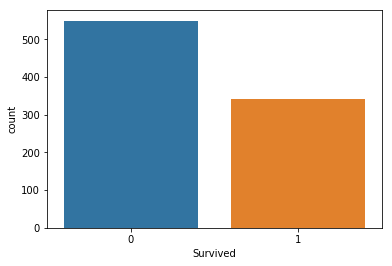

In [98]:
sns.countplot(x='Survived',data=df)

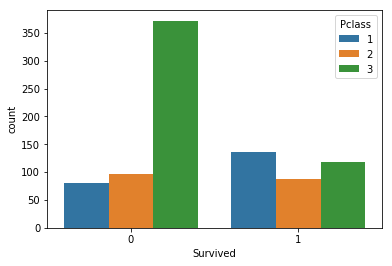

In [99]:
sns.countplot(x='Survived',hue='Pclass',data=df)

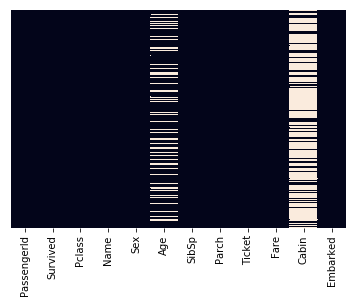

In [100]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

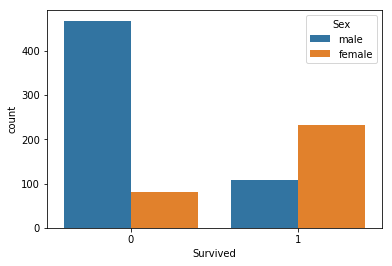

In [101]:
sns.countplot(x='Survived',hue='Sex',data=df)

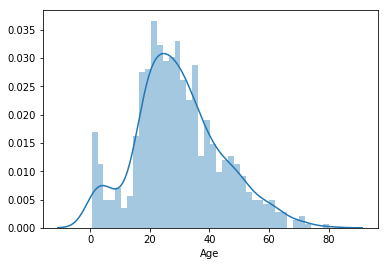

In [102]:
sns.distplot(df['Age'].dropna(),bins=40)

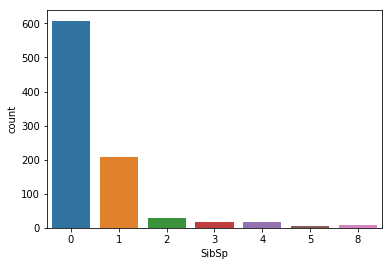

In [103]:
sns.countplot(x='SibSp',data=df)

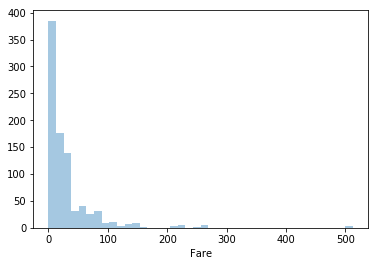

In [104]:
sns.distplot(df['Fare'],bins=40,kde=False)

In [105]:
# Data Cleaning

In [106]:
df['Age'].isnull().sum()

177

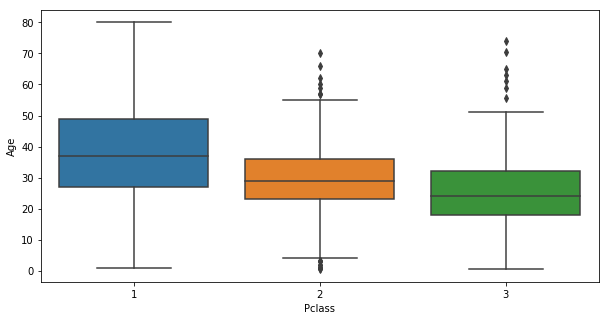

In [107]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass',y='Age',data=df)

In [108]:
x=df.groupby('Pclass')['Age'].mean()

In [109]:
x

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [110]:
def avg_age(col):
    age=col[0]
    pc=col[1]
    if pd.isnull(age):
        if pc==1:
            return x[1]
        elif pc==2:
            return x[2]
        else:
            return x[3]
    else:
        return age

In [111]:
df['Age']= df[['Age','Pclass']].apply(avg_age,axis=1)

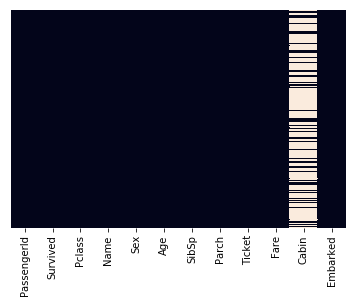

In [112]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [113]:
df.drop('Cabin',axis=1,inplace=True)

In [114]:
pd.isnull(df).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [115]:
df.dropna(inplace=True)

In [116]:
pd.isnull(df).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [117]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [118]:
df.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [119]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [120]:
pclass = pd.get_dummies(df['Pclass'],drop_first=True)

In [121]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [122]:
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [123]:
df = pd.concat([df,pclass,sex,embark],axis=1)

In [124]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,2,3,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,1,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,1,0,1


In [125]:
df.drop(['Pclass','Sex','Embarked'],axis=1,inplace=True)

In [126]:
df.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [127]:
df_test = pd.read_csv('titanic_test.csv')

In [128]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [129]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [130]:
x=df_test.groupby('Pclass')['Age'].mean()

In [131]:
x

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [132]:
def avg_age(col):
    age=col[0]
    pc=col[1]
    if pd.isnull(age):
        if pc==1:
            return x[1]
        elif pc==2:
            return x[2]
        else:
            return x[3]
    else:
        return age

In [133]:
df_test['Age']= df_test[['Age','Pclass']].apply(avg_age,axis=1)

In [134]:
df_test.drop('Cabin',axis=1,inplace=True)

In [135]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [136]:
df_test.dropna(inplace=True)

In [137]:
df_test.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)
pclass = pd.get_dummies(df_test['Pclass'],drop_first=True)
sex = pd.get_dummies(df_test['Sex'],drop_first=True)
embark = pd.get_dummies(df_test['Embarked'],drop_first=True)
df_test = pd.concat([df_test,pclass,sex,embark],axis=1)

In [138]:
df_test.drop(['Pclass','Sex','Embarked'],axis=1,inplace=True)

In [139]:
df_test.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


In [140]:
df.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
lr = LogisticRegression()

In [143]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [144]:
lr.fit(X,y)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [146]:
pred = lr.predict(df_test)

In [150]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [163]:
# KNN
# Let's divide our training data to check our predictions

In [255]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [256]:
from sklearn.neighbors import KNeighborsClassifier

In [257]:
knn = KNeighborsClassifier(n_neighbors=1)

In [258]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [259]:
pred = knn.predict(X_test)

In [260]:
from sklearn.metrics import classification_report,confusion_matrix

In [261]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[76 27]
 [30 45]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       103
           1       0.62      0.60      0.61        75

   micro avg       0.68      0.68      0.68       178
   macro avg       0.67      0.67      0.67       178
weighted avg       0.68      0.68      0.68       178



In [262]:
#Let's check for other values of k

In [263]:
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predi = knn.predict(X_test)
    error.append(np.mean(y_test != predi ))

Text(0, 0.5, 'Error')

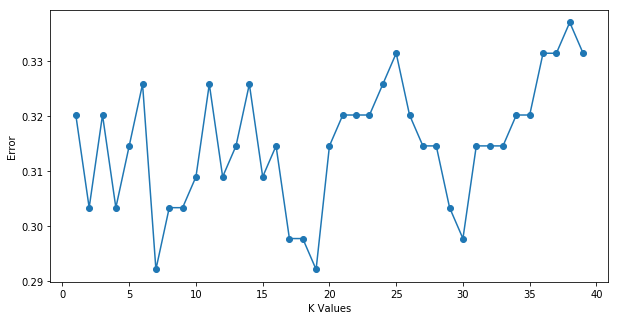

In [265]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error,marker='o')
plt.xlabel("K Values")
plt.ylabel("Error")

In [266]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [267]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[84 19]
 [33 42]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.76       103
           1       0.69      0.56      0.62        75

   micro avg       0.71      0.71      0.71       178
   macro avg       0.70      0.69      0.69       178
weighted avg       0.71      0.71      0.70       178

